<a href="https://colab.research.google.com/github/fax117/machine_learning_practices/blob/main/practicas/DataSetWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2    71
1    58
3    48
Name: Class, dtype: int64

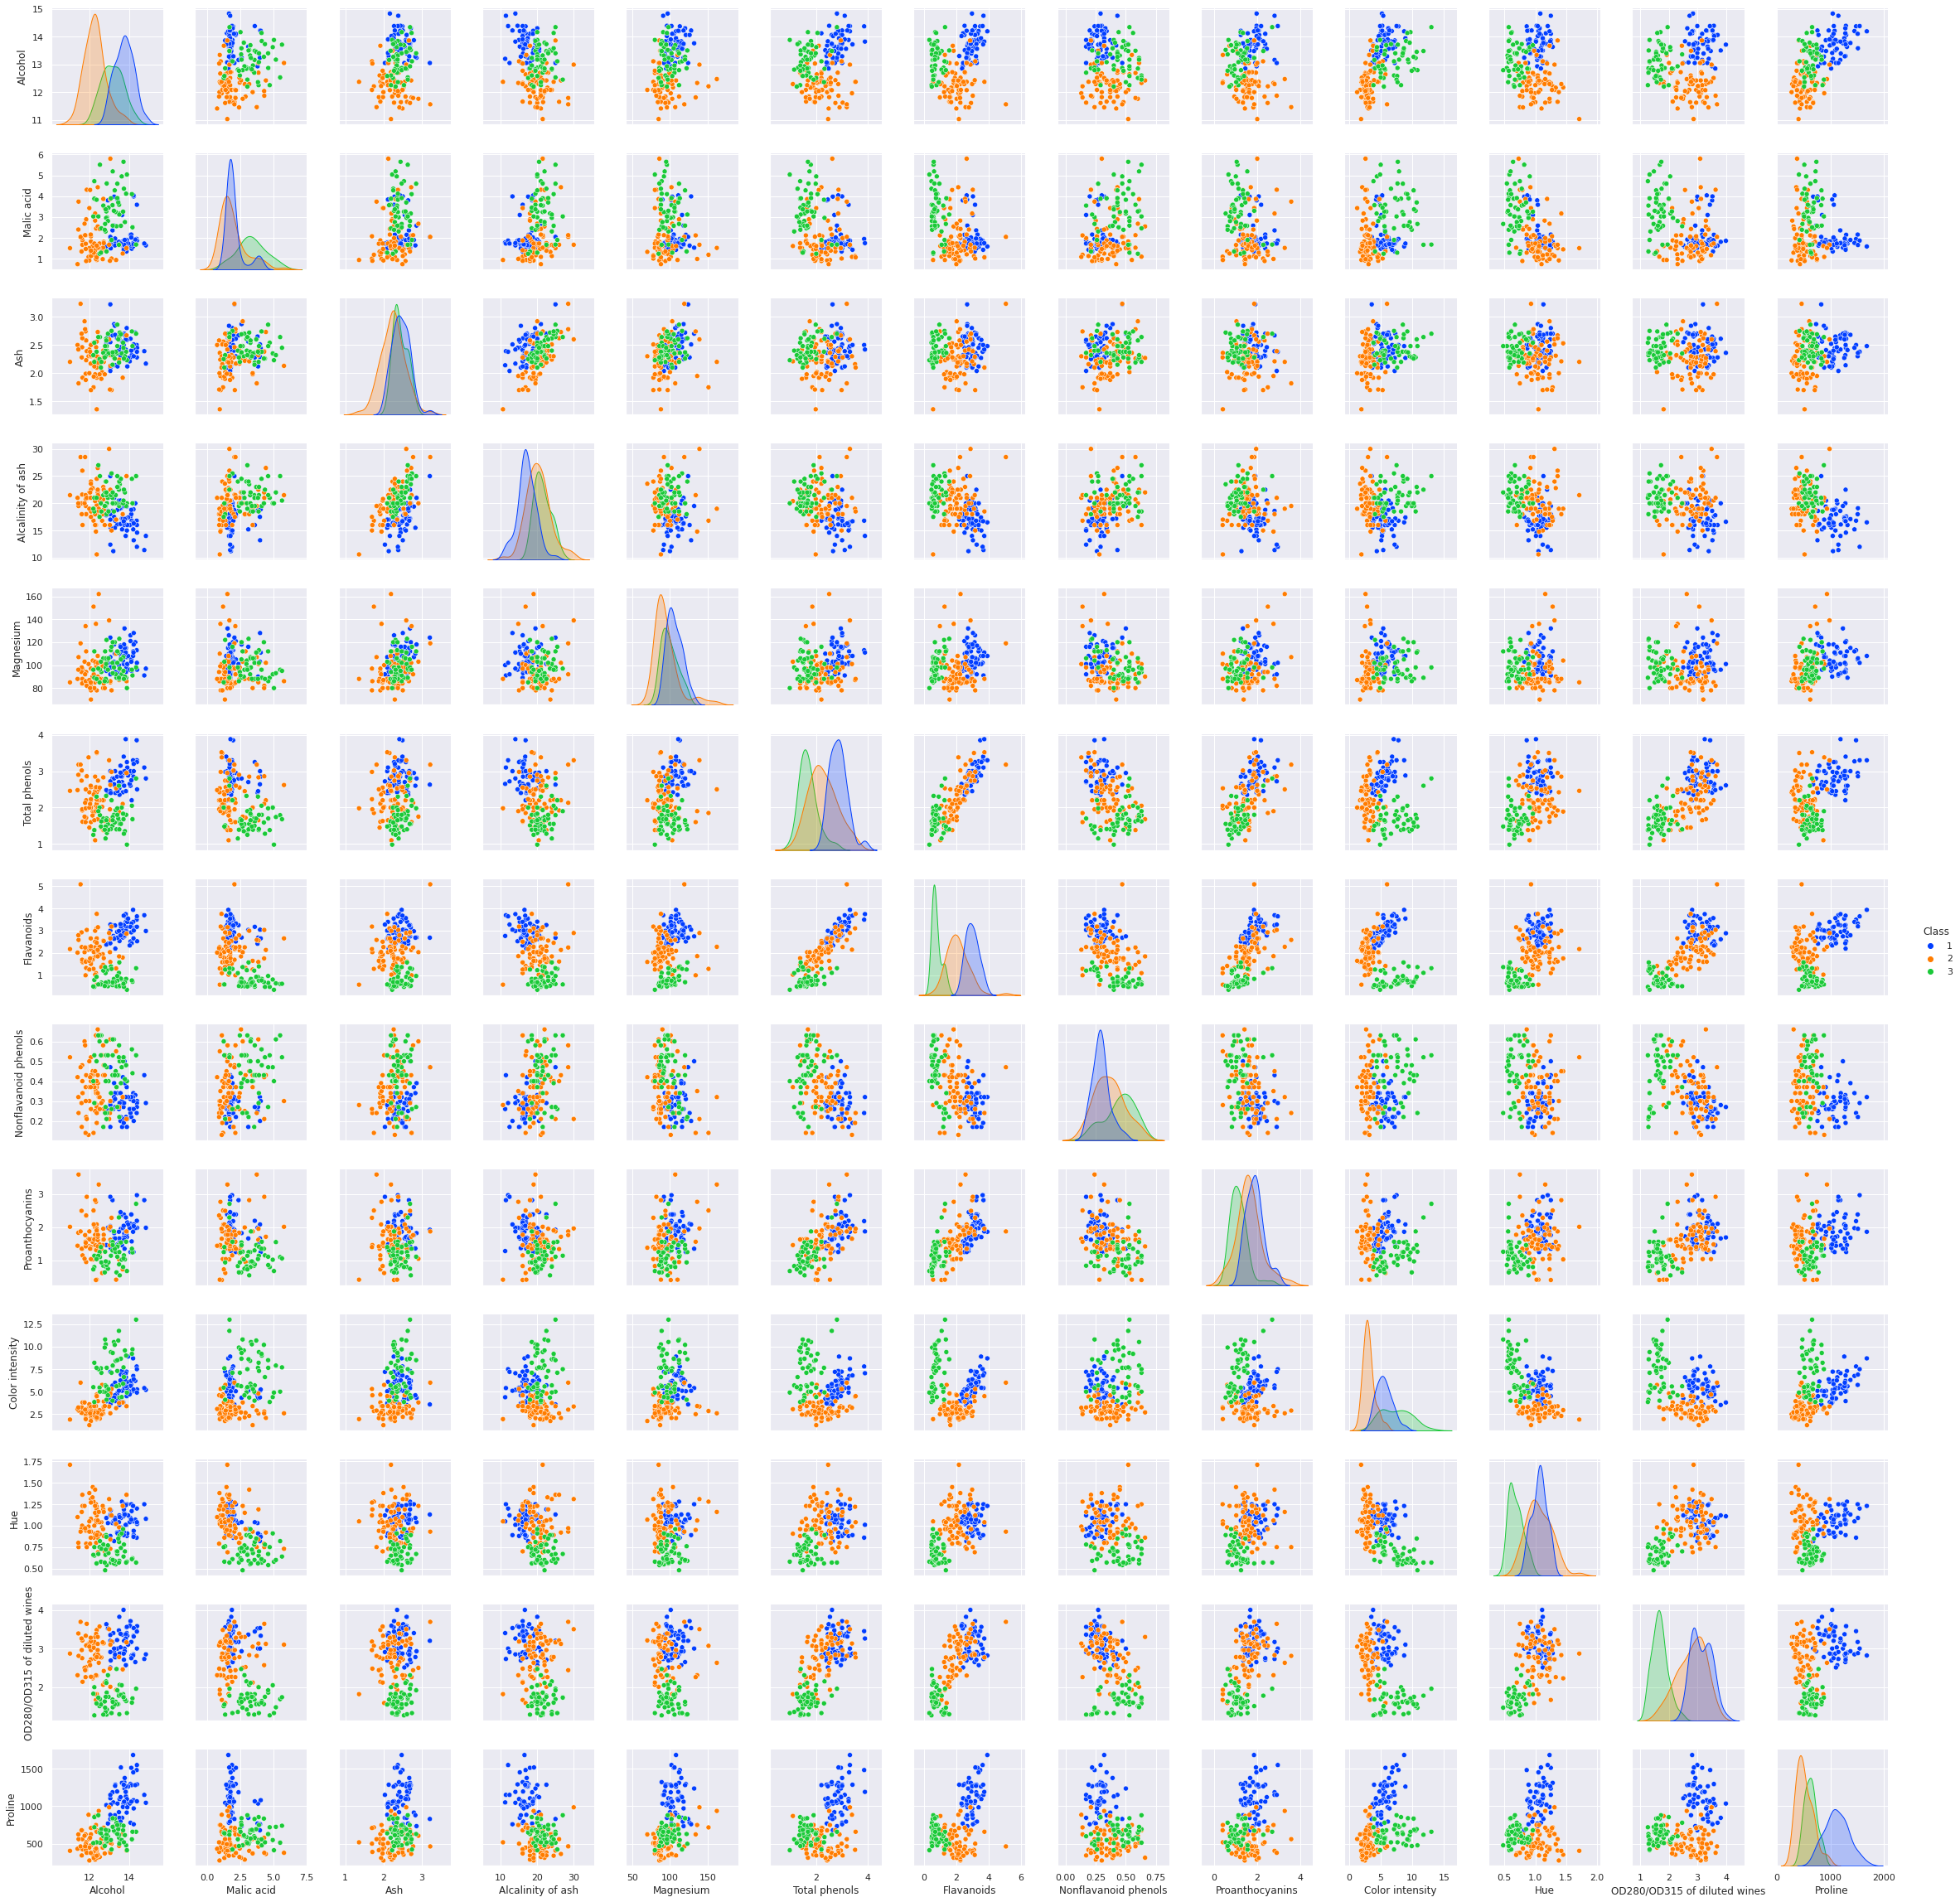

In [50]:
#https://archive.ics.uci.edu/ml/datasets/Wine

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import seaborn as sns; sns.set()


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
df=df.rename(columns={'1':'Class','14.23':'Alcohol','1.71':'Malic acid','2.43':'Ash','15.6':'Alcalinity of ash','127':'Magnesium','2.8':'Total phenols','3.06':'Flavanoids'
                  ,'.28':'Nonflavanoid phenols','2.29':'Proanthocyanins','5.64':'Color intensity','1.04':'Hue','3.92':'OD280/OD315 of diluted wines','1065':'Proline'})

sns.pairplot(df, hue='Class', 
             diag_kind='kde', #hist kde
             palette="bright",
            #  corner=True,
             height=2.5);

df.Class.value_counts()

In [51]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=100)

In [52]:
KNNW=KNeighborsClassifier()
KNNW.fit(X_train,y_train)
y_predict=KNNW.predict(X_test)
accuracy_score(y_test,y_predict)

0.6666666666666666

CrossValidation

In [53]:
for i, score in enumerate(cross_validate(KNNW, X,Y, cv=10)["test_score"]):
    print(f"Accuracy for the fold no. {i+1} on the test set: {score}")

Accuracy for the fold no. 1 on the test set: 0.6666666666666666
Accuracy for the fold no. 2 on the test set: 0.6666666666666666
Accuracy for the fold no. 3 on the test set: 0.6111111111111112
Accuracy for the fold no. 4 on the test set: 0.5555555555555556
Accuracy for the fold no. 5 on the test set: 0.6666666666666666
Accuracy for the fold no. 6 on the test set: 0.6111111111111112
Accuracy for the fold no. 7 on the test set: 0.7777777777777778
Accuracy for the fold no. 8 on the test set: 0.7058823529411765
Accuracy for the fold no. 9 on the test set: 0.8235294117647058
Accuracy for the fold no. 10 on the test set: 0.7647058823529411


GridSearchCV

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(\
                         MinMaxScaler(),
                         SelectKBest(f_classif),
                         KNeighborsClassifier())

param_grid = {
    'selectkbest__k': [5,6,7,8,9,10,11,12,13],
    'kneighborsclassifier__n_neighbors':[4,5,6,7,8,9],
    'kneighborsclassifier__p':[2,3,4]
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='accuracy', verbose=1)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    7.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('selectkbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7f94df8ed9e0>)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                  

In [55]:
gridsearch.best_score_

0.9685483870967742

## Decision Tree

In [56]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
dataset = datasets.load_wine()

In [57]:
dataset

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [58]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [59]:
X=dataset.data
y=dataset.target

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)

In [61]:
from sklearn.tree import DecisionTreeClassifier
print("#----------------------------------#")
algDTree = DecisionTreeClassifier()
algDTree.fit(X_train, y_train)
y_pred = algDTree.predict(X_test)
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='micro')
print("#----------------------------------#")
print('Precisión del modelo:')
print(precision)

#----------------------------------#
Matriz de Confusión:
[[7 0 0]
 [0 7 0]
 [0 1 3]]
#----------------------------------#
Precisión del modelo:
0.9444444444444444


In [62]:
for i, score in enumerate(cross_validate(algDTree, X,y, cv=10)["test_score"]):
  print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.8888888888888888
Accuracy for the fold no. 1 on the test set: 0.8888888888888888
Accuracy for the fold no. 2 on the test set: 0.6111111111111112
Accuracy for the fold no. 3 on the test set: 0.8888888888888888
Accuracy for the fold no. 4 on the test set: 0.8333333333333334
Accuracy for the fold no. 5 on the test set: 0.8888888888888888
Accuracy for the fold no. 6 on the test set: 1.0
Accuracy for the fold no. 7 on the test set: 0.8888888888888888
Accuracy for the fold no. 8 on the test set: 0.9411764705882353
Accuracy for the fold no. 9 on the test set: 0.7647058823529411


In [63]:
pipeline = make_pipeline(\
                         MinMaxScaler(),
                         SelectKBest(f_classif),
                         DecisionTreeClassifier())

param_grid = {
    'selectkbest__k': [5,6,7,8,9,10,11,12,13],
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='accuracy', verbose=1)

gridsearch.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('selectkbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7f94df8ed9e0>)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                    

In [64]:
gridsearch.best_score_

0.9625